In [1]:
import pair_conformal as pair_conformal
import infinite_fourier as infinite_fourier

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#np.seterr(all='raise')

Declaration of geometry

In [18]:

eps_x=[1,1,5,2]
eps_y=[1,1,20,2]
LAcomp=8
t=[0.5,0.2]
etas=[0,0.50,0]
LAcomp=[0,LAcomp,0]


compare capacitance of fourier and conformal aproach

In [19]:
max_n=180
test_fourier=infinite_fourier.multiple_recursive_images(etas,t,eps_x,eps_y,LAcomp,max_n,accuracy_limit=10**-15,hybrid=True)
fourier_C=test_fourier.get_C()
# if a RuntimeWarning is printed, this is most likely because scipy.special.legendre(n)(2*self.k**2-1) resolves to a value close to zero
# as the amplitude is close to zero, this should be of no concern

In [20]:
max_reflections=20
test_conformal=pair_conformal.multiple_recursive_images(etas,t,eps_x,eps_y,LAcomp,max_reflections,accuracy_limit=10**-15)
conformal_C=test_conformal.get_C()
conformal_C_int_E_x=test_conformal.get_C_int_Ex()
print('conformal_C:',conformal_C)
print('conformal_C_int_E_x:',conformal_C_int_E_x)
print('relative diff:',2*(conformal_C-conformal_C_int_E_x)/(conformal_C_int_E_x+conformal_C))

conformal_C: 3.678252420922692e-11
conformal_C_int_E_x: 3.664666509579689e-11
relative diff: 0.0037004116405445512


In [21]:
print('fourier:',fourier_C)
print('conformal:',conformal_C)
print('relative diff:',2*(conformal_C-fourier_C)/(fourier_C+conformal_C))

fourier: 2.6877891426816804e-11
conformal: 3.678252420922692e-11
relative diff: 0.3111708487433198


Declare parameters for plotting

In [22]:

simdatapoints=60
minx=-2
maxx=2
miny=-1.6
maxy=2.4
delta = (maxx-minx)/(simdatapoints)
x = np.arange(minx, maxx+delta*0.5, delta)
y = np.arange(miny, maxy+delta*0.5, delta)
xx, yy = np.meshgrid(x, y)


Calculate potential and electric fields using the fourier aproach

In [23]:
E_X_fourier=np.zeros((len(y),len(x)))
E_Y_fourier=np.zeros((len(y),len(x)))
V_fourier=np.zeros((len(y),len(x)))
for j in range(len(y)):
    print('y = ',y[j])
    v,ex,ey = test_fourier.get_V_Ex_Ey(x,y[j])
    V_fourier[j,:]+=v
    E_X_fourier[j,:]+=ex
    E_Y_fourier[j,:]+=ey


y =  -1.6
y =  -1.5333333333333334
y =  -1.4666666666666668
y =  -1.4000000000000001
y =  -1.3333333333333335
y =  -1.2666666666666668
y =  -1.2000000000000002
y =  -1.1333333333333335
y =  -1.0666666666666669
y =  -1.0000000000000002
y =  -0.9333333333333336
y =  -0.8666666666666669
y =  -0.8000000000000003
y =  -0.7333333333333336
y =  -0.666666666666667
y =  -0.6000000000000003
y =  -0.5333333333333337
y =  -0.466666666666667
y =  -0.40000000000000036
y =  -0.3333333333333337
y =  -0.26666666666666705
y =  -0.2000000000000004
y =  -0.13333333333333375
y =  -0.0666666666666671
y =  -4.440892098500626e-16
y =  0.06666666666666621
y =  0.13333333333333286
y =  0.1999999999999995
y =  0.26666666666666616
y =  0.3333333333333328
y =  0.39999999999999947
y =  0.46666666666666634


/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:140: RuntimeWarning: invalid value encountered in multiply
  np.poly1d.__init__(self, poly.coeffs * float(kn))
/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:1977: RuntimeWarning: overflow encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n
/usr/local/lib/python3.6/site-packages/scipy/special/orthogonal.py:1977: RuntimeWarning: invalid value encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n


y =  0.5333333333333328
y =  0.5999999999999992
y =  0.6666666666666661
y =  0.733333333333333
y =  0.7999999999999994
y =  0.8666666666666658
y =  0.9333333333333327
y =  0.9999999999999996
y =  1.066666666666666
y =  1.1333333333333324
y =  1.1999999999999993
y =  1.2666666666666662
y =  1.3333333333333326
y =  1.399999999999999
y =  1.466666666666666
y =  1.5333333333333328
y =  1.5999999999999992
y =  1.6666666666666656
y =  1.7333333333333325
y =  1.7999999999999994
y =  1.8666666666666658
y =  1.9333333333333322
y =  1.9999999999999991
y =  2.066666666666666
y =  2.1333333333333324
y =  2.199999999999999
y =  2.2666666666666657
y =  2.3333333333333326
y =  2.399999999999999


Calculate potential and electric fields using the confomral mapping aproach

In [24]:
E_X_conformal=np.zeros((len(y),len(x)))
E_Y_conformal=np.zeros((len(y),len(x)))
V_conformal=np.zeros((len(y),len(x)))
for j in range(len(y)):
    print('y = ',y[j])
    v,ex,ey = test_conformal.get_V_Ex_Ey(x,y[j])
    V_conformal[j,:]+=v
    E_X_conformal[j,:]+=ex
    E_Y_conformal[j,:]+=ey

y =  -1.6
y =  -1.5333333333333334
y =  -1.4666666666666668
y =  -1.4000000000000001
y =  -1.3333333333333335
y =  -1.2666666666666668
y =  -1.2000000000000002
y =  -1.1333333333333335
y =  -1.0666666666666669
y =  -1.0000000000000002
y =  -0.9333333333333336
y =  -0.8666666666666669
y =  -0.8000000000000003
y =  -0.7333333333333336
y =  -0.666666666666667
y =  -0.6000000000000003
y =  -0.5333333333333337
y =  -0.466666666666667
y =  -0.40000000000000036
y =  -0.3333333333333337
y =  -0.26666666666666705
y =  -0.2000000000000004
y =  -0.13333333333333375
y =  -0.0666666666666671
y =  -4.440892098500626e-16
y =  0.06666666666666621
y =  0.13333333333333286
y =  0.1999999999999995
y =  0.26666666666666616
y =  0.3333333333333328
y =  0.39999999999999947
y =  0.46666666666666634
y =  0.5333333333333328
y =  0.5999999999999992
y =  0.6666666666666661
y =  0.733333333333333
y =  0.7999999999999994
y =  0.8666666666666658
y =  0.9333333333333327
y =  0.9999999999999996
y =  1.066666666666666

Plot the potentials and electric fields, as well as difference between the two aproaches

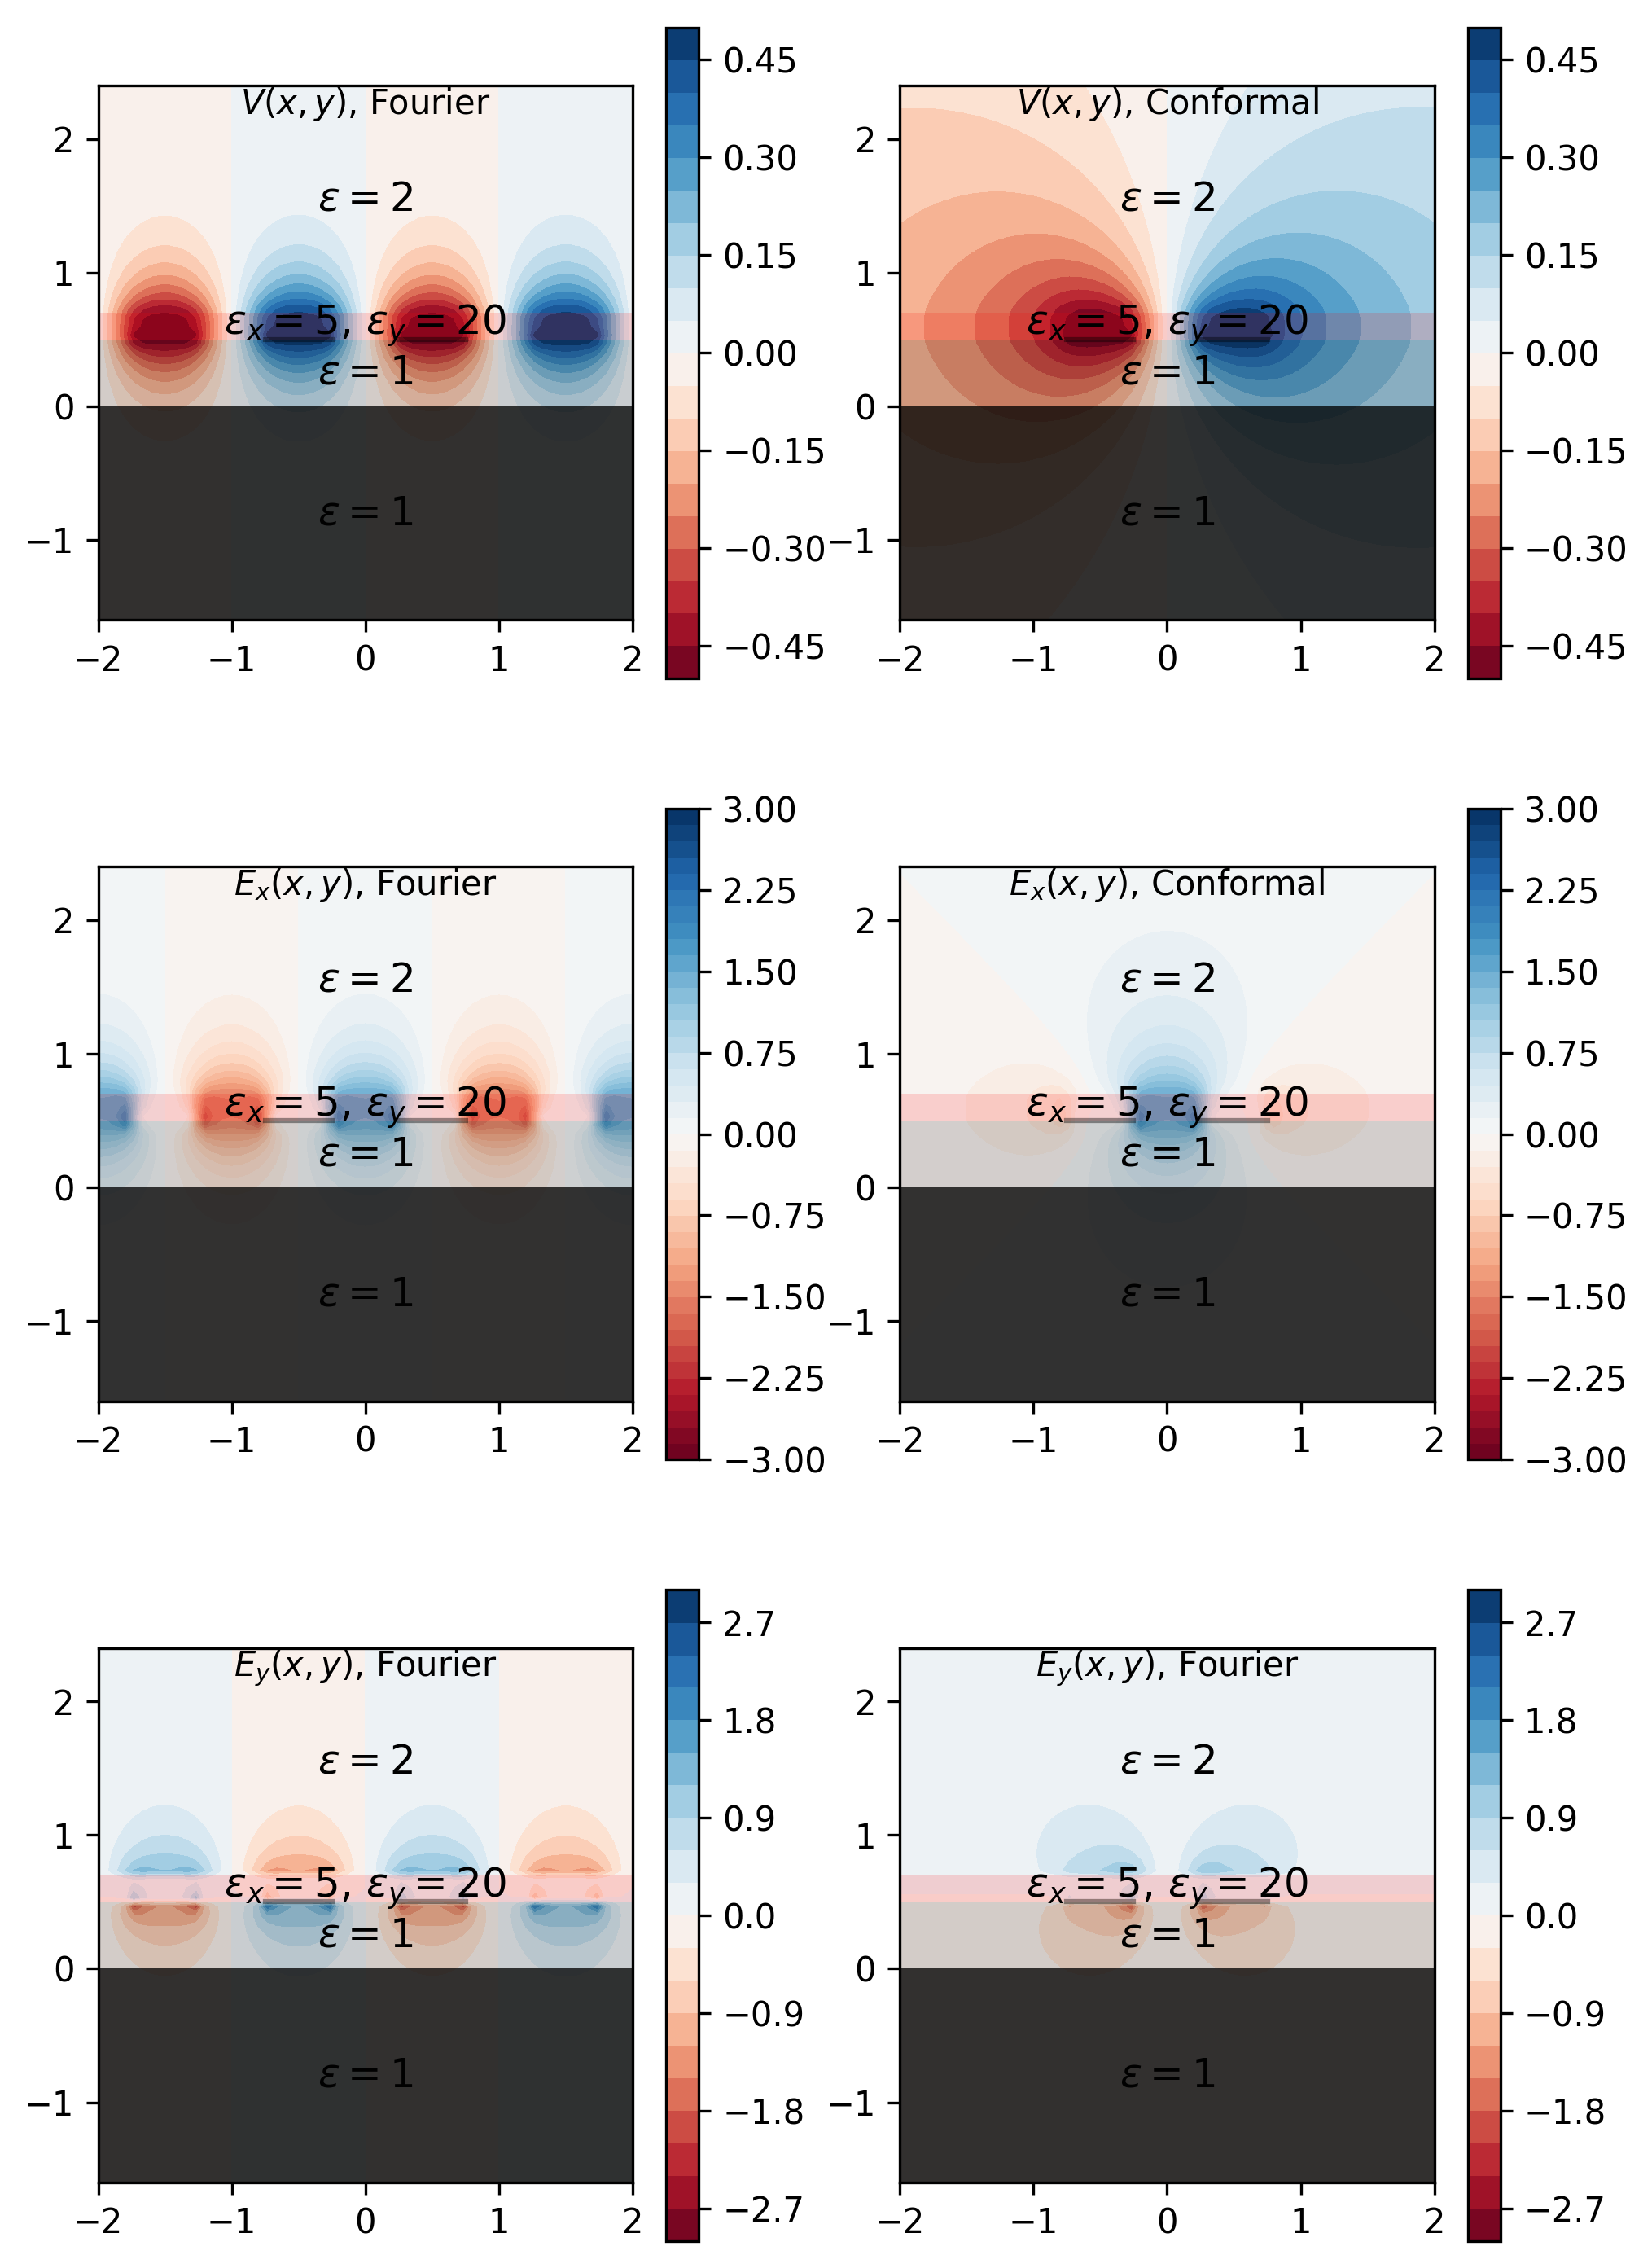

In [25]:
fig = plt.figure(num=None, figsize=(12,12), dpi=300, facecolor='w', edgecolor='k')
axes=[fig.add_subplot(3, 3, i+1) for i in [0,1,3,4,6,7]]

ts=[np.sum(t[0:i+1]) for i,_ in enumerate(t)]
y_coords=[miny,0]+ts+[maxy]
layer_colors=[[0,0,0,0.8],[0,0,0,0.15],[1,0,0,0.15],[0,0,0,0]]
for ax in axes:
    for i in range(len(layer_colors)):
        ax.add_patch(matplotlib.patches.Rectangle(
            (minx, y_coords[i]),   # (x,y)
            maxx-minx,          # width
            y_coords[i+1]-y_coords[i],          # height
            facecolor=layer_colors[i]))
        if eps_x[i]==eps_y[i]:
            ax.text(0,0.5*(y_coords[i+1]+y_coords[i]),r'$\varepsilon=$'+str(eps_x[i]), ha='center', va='center',fontsize=12)
        else:
            ax.text(0,0.5*(y_coords[i+1]+y_coords[i]),r'$\varepsilon_x=$'+str(eps_x[i])+r', $\varepsilon_y=$'+str(eps_y[i]), ha='center', va='center',fontsize=12)
    for eta, y in zip(etas, y_coords[1:-1]):
        if eta>0:
            ax.plot([-0.5-eta/2,-0.5+eta/2],[y,y], color=[0,0,0,0.4])
            ax.plot([0.5+eta/2,0.5-eta/2],[y,y], color=[0,0,0,0.4])
    ax.set_aspect('equal', 'box')

levels=np.arange(-0.5,0.51,0.05)
CS=axes[0].contourf(xx,yy, V_fourier,levels,cmap='RdBu')#,vmin=-1.2,vmax=1.2))
axes[0].text(0,maxy,r'$V(x,y)$, Fourier', ha='center', va='top')
fig.colorbar(CS, ax=axes[0])
CS=axes[1].contourf(xx,yy, V_conformal,levels,cmap='RdBu')#,vmin=-1.2,vmax=1.2))
axes[1].text(0,maxy,r'$V(x,y)$, Conformal', ha='center', va='top')
fig.colorbar(CS, ax=axes[1])

levels=np.arange(-3,3.01,0.15)
CS=axes[2].contourf(xx,yy, E_X_fourier,levels,cmap='RdBu')#,vmin=-1.2,vmax=1.2))
axes[2].text(0,maxy,r'$E_x(x,y)$, Fourier', ha='center', va='top')
fig.colorbar(CS, ax=axes[3])
CS=axes[3].contourf(xx,yy, E_X_conformal,levels,cmap='RdBu')#,vmin=-1.2,vmax=1.2))
axes[3].text(0,maxy,r'$E_x(x,y)$, Conformal', ha='center', va='top')
fig.colorbar(CS, ax=axes[2])

levels=np.arange(-3,3.01,0.3)
CS=axes[4].contourf(xx,yy, E_Y_fourier,levels,cmap='RdBu')#,vmin=-1.2,vmax=1.2))
axes[4].text(0,maxy,r'$E_y(x,y)$, Fourier', ha='center', va='top')
fig.colorbar(CS, ax=axes[4])
CS=axes[5].contourf(xx,yy, E_Y_conformal,levels,cmap='RdBu')#,vmin=-1.2,vmax=1.2))
axes[5].text(0,maxy,r'$E_y(x,y)$, Fourier', ha='center', va='top')
fig.colorbar(CS, ax=axes[5])
#fig.colorbar(CS)